Intro

In [3]:
# First set up the environment. Code sources are in folders which are in the parent folder of this notebooks scope.
import sys; sys.path.insert(0, '..') # add parent folder path, now files are queriable from parent folder

%pip install spotipy

Note: you may need to restart the kernel to use updated packages.


Create train test sets

In [4]:
# Fetch the downloaded data
from data.query.util import loadJson

notHitSongPath = '../data/datasets/spotify/not_hit_song.json'
hitSongPath = '../data/datasets/spotify/hit_song.json'

# Load the data
hits = loadJson(hitSongPath)
notHits = loadJson(notHitSongPath)

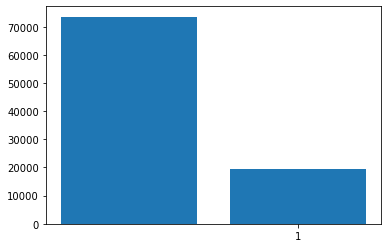

In [5]:
from data.plotting.util import makeHistogram

# Here is the number of hits and not hits
makeHistogram([0, 1], [len(notHits), len(hits)])

The hits data will be collected and stored in a pandas dataframe for further sampling and processing.

In [6]:
from pandas import DataFrame
from data.process.util import parseYearFromDate

features = []
for hit in hits:
    year = parseYearFromDate(hit['info']['spotifyData']['album']['releaseDate'])
    features.append({**hit['features'], 'year': year[2:]})

hitsDataset = DataFrame.from_records(features)
hitsDataset

,timeSignature,durationMS,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year
0,4,164442,8,1,0.00323,0.759,0.459,0.000000,0.0906,-5.187,0.0948,0.695,109.997,21
1,4,178147,9,1,0.33500,0.563,0.664,0.000000,0.0849,-5.044,0.1540,0.688,166.928,21
2,4,203808,6,0,0.05610,0.695,0.884,0.000000,0.2130,-2.278,0.0753,0.914,103.014,21
3,4,137704,8,0,0.29300,0.593,0.503,0.000000,0.4050,-6.725,0.2200,0.710,178.781,21
4,4,231041,11,0,0.04690,0.808,0.897,0.000031,0.3640,-3.712,0.0348,0.591,126.026,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19457,4,141107,0,1,0.85800,0.543,0.560,0.000000,0.3090,-8.703,0.1170,0.653,157.198,20
19458,4,159293,5,1,0.74300,0.560,0.270,0.000346,0.1720,-15.080,0.0412,0.305,78.674,66
19459,4,510960,0,1,0.93100,0.203,0.156,0.788000,0.0910,-20.173,0.0343,0.192,73.157,93
19460,4,152200,8,1,0.43200,0.744,0.508,0.000320,0.0808,-12.023,0.1150,0.686,116.528,86


Now the same to not hits.

In [181]:
features = []
for notHit in notHits:
    year = parseYearFromDate(notHit['info']['spotifyData']['album']['releaseDate'])
    features.append({**notHit['features'], 'year': year[2:]})

notHitsDataset = DataFrame.from_records(features)
notHitsDataset

,timeSignature,durationMS,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year
0,4,258004,11,0,0.00173,0.659,0.667,0.000029,0.1000,-4.668,0.0339,0.468,115.982,21
1,4,203064,6,0,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,0.915,102.977,21
2,4,195352,5,1,0.01850,0.809,0.623,0.000088,0.0538,-6.254,0.1450,0.570,114.986,21
3,4,221820,4,0,0.16700,0.730,0.729,0.000001,0.3490,-3.434,0.0884,0.467,113.011,21
4,4,200108,11,0,0.00450,0.640,0.665,0.000000,0.2200,-4.966,0.0325,0.420,113.213,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73557,3,167867,5,1,0.82700,0.465,0.342,0.000000,0.2520,-9.549,0.0301,0.516,108.041,58
73558,4,169240,5,1,0.44700,0.664,0.660,0.000000,0.2980,-6.526,0.1300,0.873,84.345,58
73559,4,138160,5,1,0.61700,0.576,0.725,0.000027,0.2370,-5.329,0.0909,0.803,183.350,58
73560,4,107467,3,1,0.72800,0.574,0.560,0.000000,0.2460,-8.466,0.0502,0.896,160.928,58


In [182]:
# Now labels in place
hitsDataset['label'] = 1
notHitsDataset['label'] = 0

A few datasets will be created for testing purposes.

Dataset 1 will have evenly among years sampled number of hit and not hits.

Dataset 2 will be the same, The year feature will be dropped from the data given to the models. This is done to see the impact of the time information.

Dataset 3 will be more focused on the later released songs by using only songs released 1985 or after.


In [183]:
for i, year in enumerate(sorted(hitsDataset['year'].unique())):
    print(f"Year: {year} Number of songs: {len(hitsDataset[hitsDataset['year'] == year])}")

Year: 00 Number of songs: 322
Year: 01 Number of songs: 352
Year: 02 Number of songs: 314
Year: 03 Number of songs: 294
Year: 04 Number of songs: 328
Year: 05 Number of songs: 593
Year: 06 Number of songs: 411
Year: 07 Number of songs: 402
Year: 08 Number of songs: 454
Year: 09 Number of songs: 422
Year: 10 Number of songs: 487
Year: 11 Number of songs: 508
Year: 12 Number of songs: 406
Year: 13 Number of songs: 418
Year: 14 Number of songs: 476
Year: 15 Number of songs: 415
Year: 16 Number of songs: 403
Year: 17 Number of songs: 449
Year: 18 Number of songs: 549
Year: 19 Number of songs: 491
Year: 20 Number of songs: 640
Year: 21 Number of songs: 467
Year: 42 Number of songs: 1
Year: 45 Number of songs: 3
Year: 47 Number of songs: 1
Year: 50 Number of songs: 1
Year: 52 Number of songs: 1
Year: 53 Number of songs: 1
Year: 54 Number of songs: 2
Year: 56 Number of songs: 5
Year: 57 Number of songs: 9
Year: 58 Number of songs: 33
Year: 59 Number of songs: 54
Year: 60 Number of songs: 79
Y

To collect even amount of songs per year, all songs before 1965 will be ignored, because of the low amount of songs.

The number of songs in the list released 1965 will be the sample size for every year. That's 192. Dataset 1 and 2 will use this sample size.

Dataset 3 will ignore all songs before 1985, so the smallest number of songs released in a year after that is 1986 with 250 songs. This will be the sample size for Dataset 3.

In [33]:
#Dataset 1 & 2

In [217]:
from pandas import concat, DataFrame

sampleSize = 192
eghtyFiveSampleSize = 250

hitSamples = None
notHitSamples = None
hitSamples85 = None
notHitSamples85 = None
count = 0
for year in hitsDataset['year'].unique():
    if int(year) < 65 and int(year) > 21:
        continue
    allHitsInYear = hitsDataset[hitsDataset['year'] == year]
    allNotHitsInYear = notHitsDataset[notHitsDataset['year'] == year]
    
    # Take the samples
    hitSample = allHitsInYear.sample(sampleSize)
    notHitSample = allNotHitsInYear.sample(sampleSize)
    
    hitSamples = hitSample if not isinstance(hitSamples, DataFrame) else concat([hitSamples, hitSample], ignore_index=True)
    notHitSamples = notHitSample if not isinstance(notHitSamples, DataFrame) else concat([notHitSamples, notHitSample], ignore_index=True)
    
    if int(year) > 85 or int(year) < 22:
        # Take the samples
        hitSample = allHitsInYear.sample(eghtyFiveSampleSize)
        notHitSample = allNotHitsInYear.sample(eghtyFiveSampleSize)
        
        hitSamples85 = hitSample if not isinstance(hitSamples85, DataFrame) else concat([hitSamples85, hitSample], ignore_index=True)
        notHitSamples85 = notHitSample if not isinstance(notHitSamples85, DataFrame) else concat([notHitSamples85, notHitSample], ignore_index=True)


In [218]:
# The hits and not hits can be concatenated to create the dataset
fullSampleDataset = concat([hitSamples, notHitSamples], ignore_index=True)
fullSampleDataset

,timeSignature,durationMS,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year,label
0,4,197800,1,1,0.278,0.657,0.715,0.000146,0.0838,-6.965,0.0273,0.487,99.991,21,1
1,4,278467,0,1,0.127,0.611,0.479,0.000274,0.0777,-16.170,0.0364,0.696,124.369,21,1
2,1,193455,1,1,0.415,0.424,0.511,0.000000,0.7050,-9.609,0.4730,0.705,77.057,21,1
3,3,155627,10,1,0.662,0.505,0.299,0.000000,0.2450,-11.465,0.0276,0.722,81.338,21,1
4,4,190680,8,1,0.723,0.532,0.584,0.000000,0.1010,-5.254,0.0248,0.367,88.003,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,4,159333,0,1,0.265,0.547,0.547,0.000000,0.1210,-10.031,0.0470,0.930,131.196,67,0
21884,4,139733,6,1,0.313,0.558,0.595,0.000000,0.0815,-8.217,0.0383,0.575,110.421,67,0
21885,3,187493,8,1,0.276,0.238,0.549,0.118000,0.3230,-8.281,0.0327,0.500,183.519,67,0
21886,4,194333,7,1,0.623,0.652,0.426,0.000004,0.3520,-16.043,0.0598,0.964,122.091,67,0


In [228]:
len(fullSampleDataset['year'].unique())

57

In [219]:
# Alsso, the hits and not hits can be concatenated to create the dataset for songs released after 1985
afterEightyFiveSampleDataset = concat([hitSamples85, notHitSamples85], ignore_index=True)
afterEightyFiveSampleDataset

,timeSignature,durationMS,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year,label
0,4,245267,0,1,0.00282,0.414,0.882,0.001520,0.0735,-4.822,0.0435,0.445,120.128,21,1
1,4,174253,3,1,0.50600,0.855,0.488,0.000000,0.3470,-4.601,0.2080,0.619,124.097,21,1
2,4,299240,2,1,0.28100,0.883,0.638,0.000006,0.0746,-5.232,0.0403,0.171,101.019,21,1
3,4,248013,7,1,0.00300,0.583,0.947,0.015400,0.1780,-8.382,0.0533,0.650,115.804,21,1
4,4,125153,8,1,0.39800,0.543,0.554,0.000038,0.2360,-14.174,0.0372,0.974,147.777,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,4,216933,0,1,0.01350,0.840,0.859,0.000010,0.0689,-8.158,0.0712,0.569,114.925,93,0
17996,4,138373,0,1,0.10300,0.736,0.612,0.347000,0.0378,-7.814,0.0489,0.928,130.067,93,0
17997,4,199573,4,1,0.55200,0.411,0.202,0.000000,0.3050,-15.826,0.0321,0.126,129.552,93,0
17998,4,121307,11,0,0.72000,0.777,0.452,0.000000,0.1660,-10.767,0.0366,0.946,123.202,93,0


In [227]:
len(afterEightyFiveSampleDataset['year'].unique())

36

Next step is to transform the data.

The transformed values will be then used as the training and testing data.

In the transformation, columns that are not in scale from 0 to 1 will be scaled into that interval. Columns that have categorical data will be OneHotEncoded, this means that as many as there are possible categories for a value, new columns are added. 1 indicates a row belonging to this category and all other columns will be set to 0.


In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Initialize the transformer
transformer = ColumnTransformer([ 
    ("scale", MinMaxScaler(), ['durationMS', 'loudness', 'tempo', 'year']),
    ("onehot", OneHotEncoder(), ['timeSignature', 'key', 'mode'])
    ], remainder='passthrough')

# Fit the transformer with the whole sampled dataset
transformer.fit(fullSampleDataset.drop(['label'],axis=1))

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['durationMS', 'loudness', 'tempo', 'year']),
                                ('onehot', OneHotEncoder(),
                                 ['timeSignature', 'key', 'mode'])])

In [231]:
datasets = {
    'one': transformer.transform(fullSampleDataset.drop(['label'], axis=1)),
    'two': transformer.transform(fullSampleDataset.drop(['label'], axis=1))[:, :-1],
    'three': transformer.transform(afterEightyFiveSampleDataset.drop(['label'], axis=1)),
    'four': transformer.transform(afterEightyFiveSampleDataset.drop(['label'], axis=1))[:, :-1],
}

labels = {
    'one': fullSampleDataset.label,
    'two': fullSampleDataset.label,
    'three': afterEightyFiveSampleDataset.label,
    'four': afterEightyFiveSampleDataset.label,
}

In [232]:
for dataset, s in datasets.items():
    l = labels[dataset]
    print(f"Dataset {dataset} shape: {s.shape} labels: {l.shape}")

Dataset one shape: (21888, 30) labels: (21888,)
Dataset two shape: (21888, 29) labels: (21888,)
Dataset three shape: (18000, 30) labels: (18000,)
Dataset four shape: (18000, 29) labels: (18000,)


In [254]:
from sklearn.model_selection import train_test_split

oneX_train, oneX_test, oneY_train, oneY_test = train_test_split(datasets['one'], labels['one'], test_size=0.2)
twoX_train, twoX_test, twoY_train, twoY_test = train_test_split(datasets['two'], labels['two'], test_size=0.2)
threeX_train, threeX_test, threeY_train, threeY_test = train_test_split(datasets['three'], labels['three'], test_size=0.2)
fourX_train, fourX_test, fourY_train, fourY_test = train_test_split(datasets['four'], labels['four'], test_size=0.2)

print(oneX_train.shape, oneX_test.shape, oneY_train.shape, oneY_test.shape)
print(twoX_train.shape, twoX_test.shape, twoY_train.shape, twoY_test.shape)
print(threeX_train.shape, threeX_test.shape, threeY_train.shape, threeY_test.shape)
print(fourX_train.shape, fourX_test.shape, fourY_train.shape, fourY_test.shape)

(17510, 30) (4378, 30) (17510,) (4378,)
(17510, 29) (4378, 29) (17510,) (4378,)
(14400, 30) (3600, 30) (14400,) (3600,)
(14400, 29) (3600, 29) (14400,) (3600,)


In [283]:
twoY_train.value_counts()

1    8831
0    8679
Name: label, dtype: int64

# Initialize models

Most of the models need hyperparameters to be set. As the values for them are not totally clear, it is common to try multiple and use the best model measured by some performance measure.

Scikit-learn GridSearch will be used. It takes in as parameters all the combinations of hyperparameters to test. It creates and fits the model one by one with all of the hyperparameter combinations. The best performing model is then usable as a result.

In [301]:
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.metrics import classification_report, confusion_matrix

groups = fullSampleDataset.label
groupsEightyFive = afterEightyFiveSampleDataset.label
group_kfold = GroupKFold(n_splits=5)

### Logistic regression

In [302]:
from sklearn.linear_model import LogisticRegression

params = [
    {
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'],  
        'multi_class': ['ovr'],
        'max_iter': [100, 250, 500, 1000],
        'C': [0.000001, 0.000001, 0.000001]
    }, 
    {
        'solver': ['saga'], 
        'penalty': ['elasticnet'], 
        'multi_class': ['ovr'], 
        'n_jobs': [-1], 
        'warm_start': [True],
        'max_iter': [1000, 10000, 100000],
        'C': [0.000001, 0.00001, 0.0001],
        'l1_ratio': [0.4, 0.5, 0.6]
    }, 
]

# Classifier trained with dataset One
logRegOne = GridSearchCV(LogisticRegression(), params, n_jobs=-1, scoring='f1')
logRegOne.fit(datasets['one'], labels['one'], groups=groups)

# Classifier trained with dataset Two
logRegTwo = GridSearchCV(LogisticRegression(), params, n_jobs=-1, scoring='f1')
logRegTwo.fit(datasets['two'], labels['two'], groups=groups)

# Classifier trained with dataset Three
logRegThree = GridSearchCV(LogisticRegression(), params, n_jobs=-1, scoring='f1')
logRegThree.fit(datasets['three'], labels['three'], groups=groupsEightyFive)

# Classifier trained with dataset Four
logRegFour = GridSearchCV(LogisticRegression(), params, n_jobs=-1, scoring='f1')
logRegFour.fit(datasets['four'], labels['four'], groups=groupsEightyFive)

print(f"Best results: One {logRegOne.best_score_} Two: {logRegTwo.best_score_} Three: {logRegThree.best_score_} Four {logRegFour.best_score_}")

print(f"Best params: \nOne {logRegOne.best_params_} \nTwo: {logRegTwo.best_params_} \nThree: {logRegThree.best_params_} \nFour {logRegFour.best_params_}")

Best results: One 0.6664211643576141 Two: 0.6648711689466795 Three: 0.6666666666666666 Four 0.6666666666666666
Best params: 
One {'C': 1e-06, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'} 
Two: {'C': 1e-06, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'} 
Three: {'C': 1e-06, 'l1_ratio': 0.4, 'max_iter': 100000, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga', 'warm_start': True} 
Four {'C': 0.0001, 'l1_ratio': 0.6, 'max_iter': 100000, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga', 'warm_start': True}


Final model training

In [303]:
from sklearn.linear_model import LogisticRegression

LRmodelOne = LogisticRegression(**{'C': 1e-06, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'})
LRmodelTwo = LogisticRegression(**{'C': 1e-06, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'})
LRmodelThree = LogisticRegression(**{'C': 1e-05, 'l1_ratio': 0.5, 'max_iter': 10000, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga', 'warm_start': True})
LRmodelFour = LogisticRegression(**{'C': 0.0001, 'l1_ratio': 0.4, 'max_iter': 100000, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga', 'warm_start': True})

# Train the models
LRmodelOne.fit(oneX_train, oneY_train)
LRmodelTwo.fit(twoX_train, twoY_train)
LRmodelThree.fit(threeX_train, threeY_train)
LRmodelFour.fit(fourX_train, fourY_train)

LogisticRegression(C=0.0001, l1_ratio=0.4, max_iter=100000, multi_class='ovr',
                   n_jobs=-1, penalty='elasticnet', solver='saga',
                   warm_start=True)

In [304]:
print(classification_report(oneY_test, LRmodelOne.predict(oneX_test)))
print(classification_report(twoY_test, LRmodelTwo.predict(twoX_test)))
print(classification_report(threeY_test, LRmodelThree.predict(threeX_test)))
print(classification_report(fourY_test, LRmodelFour.predict(fourX_test)))

              precision    recall  f1-score   support

           0       0.75      0.00      0.00      2242
           1       0.49      1.00      0.66      2136

    accuracy                           0.49      4378
   macro avg       0.62      0.50      0.33      4378
weighted avg       0.62      0.49      0.32      4378

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2265
           1       0.48      1.00      0.65      2113

    accuracy                           0.48      4378
   macro avg       0.74      0.50      0.33      4378
weighted avg       0.75      0.48      0.31      4378

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1782
           1       0.00      0.00      0.00      1818

    accuracy                           0.49      3600
   macro avg       0.25      0.50      0.33      3600
weighted avg       0.25      0.49      0.33      3600

              preci

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

In [298]:
logRegOne.best_estimator_.predict_proba(oneX_train)

array([[0.50763686, 0.49236314],
       [0.50763686, 0.49236314],
       [0.50763686, 0.49236314],
       ...,
       [0.50763686, 0.49236314],
       [0.50763686, 0.49236314],
       [0.50763686, 0.49236314]])

In [279]:
print(confusion_matrix(oneY_train, logRegOne.best_estimator_.predict(oneX_train)))

[[8702    0]
 [8808    0]]


### Support Vector Machine

In [246]:
from sklearn.svm import SVC

params = [
    {
        'kernel': ['linear', 'rbf'], 
        'class_weight': [None, 'balanced'],
        'max_iter': [-1],
        'C': [3.0, 5.0, 10.0],
        'gamma': [0.1, 'auto']
    },
]

# Classifier trained with dataset One
svmOne = GridSearchCV(SVC(), params, n_jobs=-1, scoring='f1')
svmOne.fit(datasets['one'], labels['one'], groups=groups)

# Classifier trained with dataset Two
svmTwo = GridSearchCV(SVC(), params, n_jobs=-1, scoring='f1')
svmTwo.fit(datasets['two'], labels['two'], groups=groups)

# Classifier trained with dataset Three
svmThree = GridSearchCV(SVC(), params, n_jobs=-1, scoring='f1')
svmThree.fit(datasets['three'], labels['three'], groups=groupsEightyFive)

# Classifier trained with dataset Four
svmFour = GridSearchCV(SVC(), params, n_jobs=-1, scoring='f1')
svmFour.fit(datasets['four'], labels['four'], groups=groupsEightyFive)

print(f"Best results: One {svmOne.best_score_} Two: {svmTwo.best_score_} Three: {svmThree.best_score_} Four {svmFour.best_score_}")

print(f"Best params: \nOne {svmOne.best_params_} \nTwo: {svmTwo.best_params_} \nThree: {svmThree.best_params_} \nFour {svmFour.best_params_}")

Best results: One 0.6078443330035845 Two: 0.6079159330507976 Three: 0.6089515474916861 Four 0.6100533607829208
Best params: 
One {'C': 3.0, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1} 
Two: {'C': 3.0, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1} 
Three: {'C': 10.0, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1} 
Four {'C': 3.0, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1}


In [290]:
from sklearn.svm import SVC

SVMmodelOne = SVC(**{'C': 3.0, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1})
SVMmodelTwo = SVC(**{'C': 3.0, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1})
SVMmodelThree = SVC(**{'C': 10.0, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1})
SVMmodelFour = SVC(**{'C': 3.0, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1})

# Train the models
SVMmodelOne.fit(oneX_train, oneY_train)
SVMmodelTwo.fit(twoX_train, twoY_train)
SVMmodelThree.fit(threeX_train, threeY_train)
SVMmodelFour.fit(fourX_train, fourY_train)

SVC(C=3.0, gamma=0.1, kernel='linear')

In [291]:
print(classification_report(oneY_test, SVMmodelOne.predict(oneX_test)))
print(classification_report(twoY_test, SVMmodelTwo.predict(twoX_test)))
print(classification_report(threeY_test, SVMmodelThree.predict(threeX_test)))
print(classification_report(fourY_test, SVMmodelFour.predict(fourX_test)))

              precision    recall  f1-score   support

           0       0.58      0.40      0.47      2242
           1       0.52      0.70      0.60      2136

    accuracy                           0.54      4378
   macro avg       0.55      0.55      0.53      4378
weighted avg       0.55      0.54      0.53      4378

              precision    recall  f1-score   support

           0       0.57      0.34      0.43      2265
           1       0.51      0.73      0.60      2113

    accuracy                           0.53      4378
   macro avg       0.54      0.53      0.51      4378
weighted avg       0.54      0.53      0.51      4378

              precision    recall  f1-score   support

           0       0.56      0.35      0.43      1782
           1       0.53      0.72      0.61      1818

    accuracy                           0.54      3600
   macro avg       0.54      0.54      0.52      3600
weighted avg       0.54      0.54      0.52      3600

              preci

### Neural Network

In [247]:
from sklearn.neural_network import MLPClassifier

params = [
    {
        'hidden_layer_sizes': [
            (10,),
            (20,),
        ], 
        'activation': ['relu', 'logistic'],  
        'solver': ['lbfgs', 'adam'],
        'max_iter': [10000],
        'alpha': [0.0001, 0.001],
        'early_stopping': [True]
    }, 
]

# Classifier trained with dataset One
MLPOne = GridSearchCV(MLPClassifier(), params, n_jobs=-1, scoring='f1')
MLPOne.fit(datasets['one'], labels['one'], groups=groups)

# Classifier trained with dataset Two
MLPTwo = GridSearchCV(MLPClassifier(), params, n_jobs=-1, scoring='f1')
MLPTwo.fit(datasets['two'], labels['two'], groups=groups)

# Classifier trained with dataset Three
MLPThree = GridSearchCV(MLPClassifier(), params, n_jobs=-1, scoring='f1')
MLPThree.fit(datasets['three'], labels['three'], groups=groupsEightyFive)

# Classifier trained with dataset Four
MLPFour = GridSearchCV(MLPClassifier(), params, n_jobs=-1, scoring='f1')
MLPFour.fit(datasets['four'], labels['four'], groups=groupsEightyFive)

print(f"Best results: One {MLPOne.best_score_} Two: {MLPTwo.best_score_} Three: {MLPThree.best_score_} Four {MLPFour.best_score_}")

print(f"Best params: \nOne {MLPOne.best_params_} \nTwo: {MLPTwo.best_params_} \nThree: {MLPThree.best_params_} \nFour {MLPFour.best_params_}")

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Best results: One 0.5992634826441268 Two: 0.5950955510592764 Three: 0.5958644650679255 Four 0.589312955717371
Best params: 
One {'activation': 'logistic', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'solver': 'adam'} 
Two: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (20,), 'max_iter': 10000, 'solver': 'adam'} 
Three: {'activation': 'logistic', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'solver': 'adam'} 
Four {'activation': 'logistic', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (20,), 'max_iter': 10000, 'solver': 'adam'}


In [294]:
from sklearn.neural_network import MLPClassifier

MLPmodelOne = MLPClassifier(**{'activation': 'logistic', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'solver': 'adam'})
MLPmodelTwo = MLPClassifier(**{'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (20,), 'max_iter': 10000, 'solver': 'adam'})
MLPmodelThree = MLPClassifier(**{'activation': 'logistic', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'solver': 'adam'})
MLPmodelFour = MLPClassifier(**{'activation': 'logistic', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (20,), 'max_iter': 10000, 'solver': 'adam'})

# Train the models
MLPmodelOne.fit(oneX_train, oneY_train)
MLPmodelTwo.fit(twoX_train, twoY_train)
MLPmodelThree.fit(threeX_train, threeY_train)
MLPmodelFour.fit(fourX_train, fourY_train)

MLPClassifier(activation='logistic', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(20,), max_iter=10000)

In [295]:
print(classification_report(oneY_test, MLPmodelOne.predict(oneX_test)))
print(classification_report(twoY_test, MLPmodelTwo.predict(twoX_test)))
print(classification_report(threeY_test, MLPmodelThree.predict(threeX_test)))
print(classification_report(fourY_test, MLPmodelFour.predict(fourX_test)))

              precision    recall  f1-score   support

           0       0.55      0.45      0.50      2242
           1       0.52      0.62      0.56      2136

    accuracy                           0.53      4378
   macro avg       0.53      0.53      0.53      4378
weighted avg       0.54      0.53      0.53      4378

              precision    recall  f1-score   support

           0       0.56      0.40      0.47      2265
           1       0.51      0.67      0.58      2113

    accuracy                           0.53      4378
   macro avg       0.54      0.53      0.52      4378
weighted avg       0.54      0.53      0.52      4378

              precision    recall  f1-score   support

           0       0.54      0.39      0.45      1782
           1       0.53      0.67      0.59      1818

    accuracy                           0.53      3600
   macro avg       0.53      0.53      0.52      3600
weighted avg       0.53      0.53      0.52      3600

              preci

### Random Froest

In [252]:
from sklearn.ensemble import RandomForestClassifier

params = [
    {
        'n_estimators': [800, 1600],
        'n_jobs': [-1],
        'max_features': [8, 10, 'auto']
    },
]

# Classifier trained with dataset One
forestOne = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, scoring='f1')
forestOne.fit(datasets['one'], labels['one'], groups=groups)

# Classifier trained with dataset Two
forestTwo = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, scoring='f1')
forestTwo.fit(datasets['two'], labels['two'], groups=groups)

# Classifier trained with dataset Three
forestThree = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, scoring='f1')
forestThree.fit(datasets['three'], labels['three'], groups=groupsEightyFive)

# Classifier trained with dataset Four
forestFour = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, scoring='f1')
forestFour.fit(datasets['four'], labels['four'], groups=groupsEightyFive)

print(f"Best results: One {forestOne.best_score_} Two: {forestTwo.best_score_} Three: {forestThree.best_score_} Four {forestFour.best_score_}")

print(f"Best params: \nOne {forestOne.best_params_} \nTwo: {forestTwo.best_params_} \nThree: {forestThree.best_params_} \nFour {forestFour.best_params_}")

/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best results: One 0.5739777559448711 Two: 0.5713140817865076 Three: 0.5701883793694845 Four 0.5665810855681934
Best params: 
One {'max_features': 'auto', 'n_estimators': 1600, 'n_jobs': -1} 
Two: {'max_features': 8, 'n_estimators': 1600, 'n_jobs': -1} 
Three: {'max_features': 'auto', 'n_estimators': 800, 'n_jobs': -1} 
Four {'max_features': 8, 'n_estimators': 1600, 'n_jobs': -1}


In [299]:
from sklearn.ensemble import RandomForestClassifier

RFmodelOne = RandomForestClassifier(**{'max_features': 'auto', 'n_estimators': 1600, 'n_jobs': -1})
RFmodelTwo = RandomForestClassifier(**{'max_features': 8, 'n_estimators': 1600, 'n_jobs': -1})
RFmodelThree = RandomForestClassifier(**{'max_features': 'auto', 'n_estimators': 800, 'n_jobs': -1})
RFmodelFour = RandomForestClassifier(**{'max_features': 8, 'n_estimators': 1600, 'n_jobs': -1})

# Train the models
RFmodelOne.fit(oneX_train, oneY_train)
RFmodelTwo.fit(twoX_train, twoY_train)
RFmodelThree.fit(threeX_train, threeY_train)
RFmodelFour.fit(fourX_train, fourY_train)

RandomForestClassifier(max_features=8, n_estimators=1600, n_jobs=-1)

In [300]:
print(classification_report(oneY_test, RFmodelOne.predict(oneX_test)))
print(classification_report(twoY_test, RFmodelTwo.predict(twoX_test)))
print(classification_report(threeY_test, RFmodelThree.predict(threeX_test)))
print(classification_report(fourY_test, RFmodelFour.predict(fourX_test)))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      2242
           1       0.54      0.63      0.58      2136

    accuracy                           0.56      4378
   macro avg       0.56      0.56      0.56      4378
weighted avg       0.56      0.56      0.56      4378

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      2265
           1       0.54      0.63      0.58      2113

    accuracy                           0.56      4378
   macro avg       0.56      0.56      0.56      4378
weighted avg       0.56      0.56      0.56      4378

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1782
           1       0.56      0.60      0.58      1818

    accuracy                           0.56      3600
   macro avg       0.56      0.56      0.55      3600
weighted avg       0.56      0.56      0.56      3600

              preci